In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [4]:
#1.Prepare the data
import pandas as pd
df = pd.read_csv('IA3-1.csv')
df.head()

,description,Maker_Model
0,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series M
1,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
2,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
3,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
4,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series


In [29]:
desc = [row.split(',') for row in df['description']]
desc

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Serie

In [30]:
#2.Run the model
import gensim
model = gensim.models.Word2Vec(tag, min_count=1, vector_size=50, workers=3, window=3, sg=1)

In [31]:
model.wv.__getitem__('Toyota Camry')

array([-0.03330871,  0.09177789,  0.03215658, -0.07283984, -0.09639727,
       -0.21828398, -0.0231216 ,  0.2737161 , -0.0976206 , -0.08632374,
        0.08566116,  0.04152669,  0.05711277, -0.03865188, -0.02649842,
        0.1541885 ,  0.110717  ,  0.23117122, -0.09464508, -0.35137242,
       -0.00378488, -0.05720767,  0.22836728,  0.05985197,  0.1782695 ,
       -0.00931078, -0.04007119,  0.35271275, -0.04672958, -0.00641563,
        0.02223298,  0.09933441,  0.04151747,  0.04111713,  0.07224608,
       -0.12751023,  0.13174589, -0.00502656,  0.05747384,  0.04670485,
        0.03637531, -0.01719079, -0.20350532,  0.1032488 ,  0.30766895,
        0.02208073, -0.04704428, -0.1465068 ,  0.03303882,  0.02659994],
      dtype=float32)

In [13]:
#3.Compute the similarity between 'Porsche 718 Cayman' and 'Nissan Van'
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')   

0.8296622

In [14]:
#4.Find the five most similar to 'Mercedes-Benz SLK-Class'
model.wv.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Pontiac Solstice', 0.9911735653877258),
 ('Audi S5', 0.9883603453636169),
 ('Audi RS 5', 0.9871532917022705),
 ('Audi TTS', 0.9865743517875671),
 ('Aston Martin DB7', 0.9860501289367676)]

In [25]:
#5. Generate a t-SNE graph for a list of 50 unique cars.
from sklearn.manifold import TSNE
veh = df['Maker_Model'].unique().tolist()
veh_m = veh[0:50]
print(veh_m)

['BMW 1 Series M', 'BMW 1 Series', 'Audi 100', 'FIAT 124 Spider', 'Mercedes-Benz 190-Class', 'BMW 2 Series', 'Audi 200', 'Chrysler 200', 'Nissan 200SX', 'Nissan 240SX', 'Volvo 240', 'Mazda 2', 'BMW 3 Series Gran Turismo', 'BMW 3 Series', 'Mercedes-Benz 300-Class', 'Mitsubishi 3000GT', 'Chrysler 300', 'Chrysler 300M', 'Nissan 300ZX', 'Mazda 323', 'Mercedes-Benz 350-Class', 'Nissan 350Z', 'Ferrari 360', 'Nissan 370Z', 'Mazda 3', 'BMW 4 Series Gran Coupe', 'BMW 4 Series', 'Mercedes-Benz 400-Class', 'Mercedes-Benz 420-Class', 'Ferrari 456M', 'Ferrari 458 Italia', 'Alfa Romeo 4C', 'Toyota 4Runner', 'BMW 5 Series Gran Turismo', 'BMW 5 Series', 'Mercedes-Benz 500-Class', 'FIAT 500e', 'FIAT 500', 'FIAT 500L', 'FIAT 500X', 'Ferrari 550', 'Mercedes-Benz 560-Class', 'McLaren 570S', 'Ferrari 575M', 'Maybach 57', 'Ferrari 599', 'Mazda 5', 'BMW 6 Series Gran Coupe', 'BMW 6 Series', 'Mercedes-Benz 600-Class']


In [32]:
X = model.wv.__getitem__(veh_m)

In [33]:
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1000, random_state =100)
Y = tsne_model.fit_transform(X)

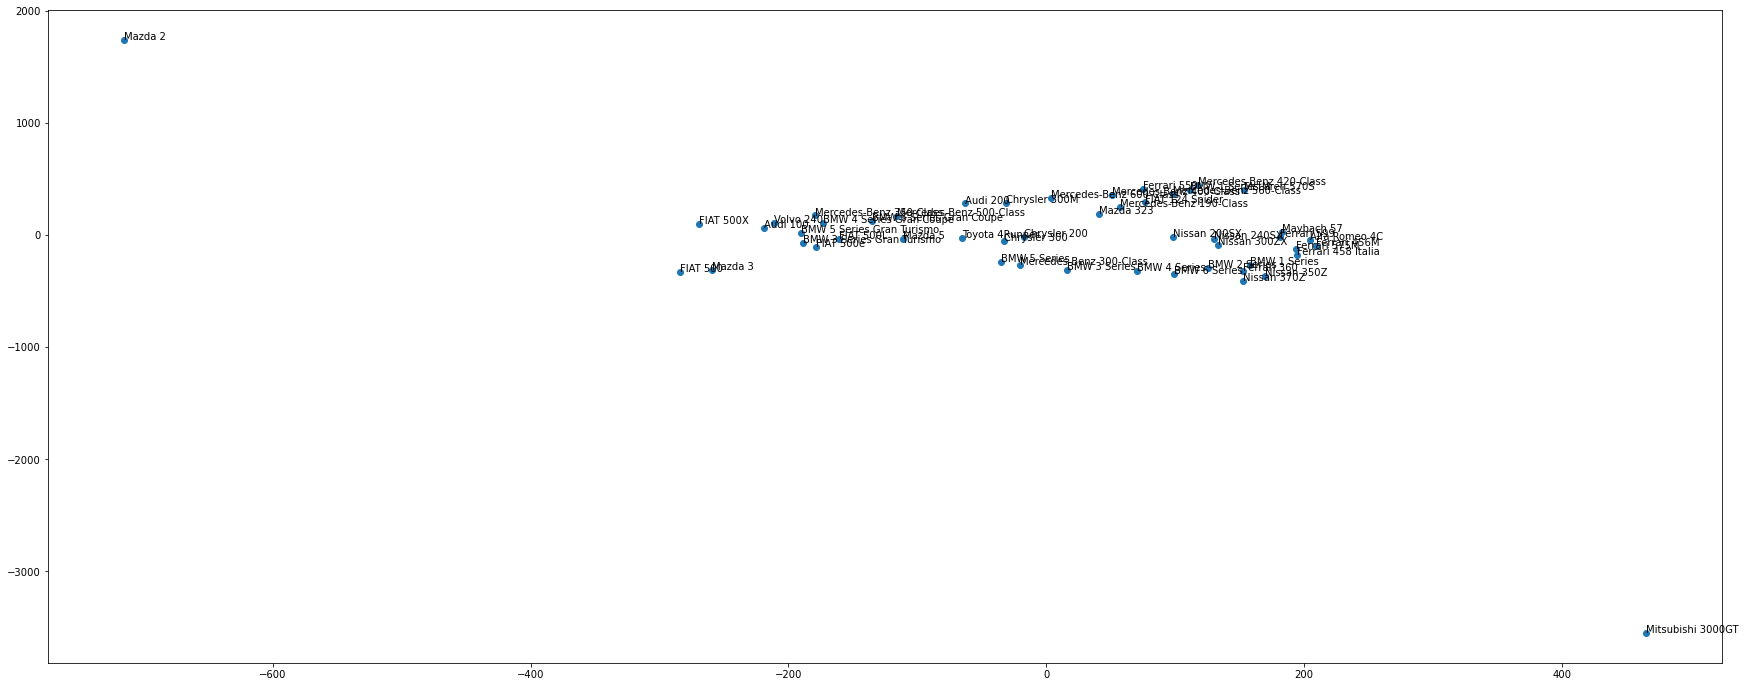

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,12))
ax.scatter(Y[:, 0], Y[:, 1])
for i, maker in enumerate(veh_m):
    plt.annotate(maker, xy=(Y[i, 0], Y[i, 1]))
plt.show()